In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Nasa_Space_Apps/data.csv",index_col=0)
df= df.drop(["Range","Label"],axis=1)
df=df.drop("Unnamed: 0.1", axis=1)
df["time"]= pd.to_datetime(df["time"])
df.index= df["time"]
df=df.drop("time",axis=1)
df

,BGSM1,BGSM2,BGSM3,BGSE1,BGSE2,BGSE3
time,,,,,,
2003-08-02 00:00:00,-4.026208,2.746652,-3.180378,-4.026194,2.446195,-3.416094
2003-08-02 00:20:00,-4.817634,1.867184,-2.034130,-4.817625,1.660636,-2.207846
2003-08-02 00:40:00,-5.015400,1.871090,-0.376598,-5.015398,1.818871,-0.571951
2003-08-02 01:00:00,-5.219594,1.665034,-0.166770,-5.219593,1.634691,-0.357167
2003-08-02 01:20:00,-4.009341,2.692525,-0.827312,-4.009337,2.568638,-1.156507
...,...,...,...,...,...,...
2021-10-02 22:00:00,-3.001255,2.242306,0.813602,-3.001244,2.370445,0.266437
2021-10-02 22:20:00,-3.091604,2.217035,0.827192,-3.091593,2.348637,0.288937
2021-10-02 22:40:00,-2.842662,2.096434,1.483598,-2.842642,2.383809,0.955910


In [ ]:
df['Seconds'] = df.index.map(pd.Timestamp.timestamp)
df

,BGSM1,BGSM2,BGSM3,BGSE1,BGSE2,BGSE3,Seconds
time,,,,,,,
2003-08-02 00:00:00,-4.026208,2.746652,-3.180378,-4.026194,2.446195,-3.416094,1.059782e+09
2003-08-02 00:20:00,-4.817634,1.867184,-2.034130,-4.817625,1.660636,-2.207846,1.059784e+09
2003-08-02 00:40:00,-5.015400,1.871090,-0.376598,-5.015398,1.818871,-0.571951,1.059785e+09
2003-08-02 01:00:00,-5.219594,1.665034,-0.166770,-5.219593,1.634691,-0.357167,1.059786e+09
2003-08-02 01:20:00,-4.009341,2.692525,-0.827312,-4.009337,2.568638,-1.156507,1.059787e+09
...,...,...,...,...,...,...,...
2021-10-02 22:00:00,-3.001255,2.242306,0.813602,-3.001244,2.370445,0.266437,1.633212e+09
2021-10-02 22:20:00,-3.091604,2.217035,0.827192,-3.091593,2.348637,0.288937,1.633213e+09
2021-10-02 22:40:00,-2.842662,2.096434,1.483598,-2.842642,2.383809,0.955910,1.633214e+09


In [ ]:
day = 60*60*24
year = 365.2425*day

df['day_sin'] = np.sin(df['Seconds'] * (2* np.pi / day))
df['day_cos'] = np.cos(df['Seconds'] * (2 * np.pi / day))
df['year_sin'] = np.sin(df['Seconds'] * (2 * np.pi / year))
df['year_cos'] = np.cos(df['Seconds'] * (2 * np.pi / year))
df.head()

,BGSM1,BGSM2,BGSM3,BGSE1,BGSE2,BGSE3,Seconds,day_sin,day_cos,year_sin,year_cos
time,,,,,,,,,,,
2003-08-02 00:00:00,-4.026208,2.746652,-3.180378,-4.026194,2.446195,-3.416094,1.059782e+09,-1.026605e-11,1.000000,-0.499097,-0.866546
2003-08-02 00:20:00,-4.817634,1.867184,-2.034130,-4.817625,1.660636,-2.207846,1.059784e+09,8.715574e-02,0.996195,-0.499304,-0.866427
2003-08-02 00:40:00,-5.015400,1.871090,-0.376598,-5.015398,1.818871,-0.571951,1.059785e+09,1.736482e-01,0.984808,-0.499511,-0.866308
2003-08-02 01:00:00,-5.219594,1.665034,-0.166770,-5.219593,1.634691,-0.357167,1.059786e+09,2.588190e-01,0.965926,-0.499718,-0.866188
2003-08-02 01:20:00,-4.009341,2.692525,-0.827312,-4.009337,2.568638,-1.156507,1.059787e+09,3.420201e-01,0.939693,-0.499924,-0.866069


In [ ]:
df = df.drop('Seconds', axis=1)
df.head()

,BGSM1,BGSM2,BGSM3,BGSE1,BGSE2,BGSE3,day_sin,day_cos,year_sin,year_cos
time,,,,,,,,,,
2003-08-02 00:00:00,-4.026208,2.746652,-3.180378,-4.026194,2.446195,-3.416094,-1.026605e-11,1.000000,-0.499097,-0.866546
2003-08-02 00:20:00,-4.817634,1.867184,-2.034130,-4.817625,1.660636,-2.207846,8.715574e-02,0.996195,-0.499304,-0.866427
2003-08-02 00:40:00,-5.015400,1.871090,-0.376598,-5.015398,1.818871,-0.571951,1.736482e-01,0.984808,-0.499511,-0.866308
2003-08-02 01:00:00,-5.219594,1.665034,-0.166770,-5.219593,1.634691,-0.357167,2.588190e-01,0.965926,-0.499718,-0.866188
2003-08-02 01:20:00,-4.009341,2.692525,-0.827312,-4.009337,2.568638,-1.156507,3.420201e-01,0.939693,-0.499924,-0.866069


In [ ]:
def df_to_X_y3(df, window_size=70):
  df_as_np = df.to_numpy()
  X = []
  y = []
  time=[]
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    row_time = [r for r in df.index[i:i+window_size]]
    X.append(row)
    time.append(row_time)
    label = df_as_np[i+window_size][:6]
    y.append(label)
  return np.array(X), np.array(y), np.array(time)

In [ ]:
X,y,time = df_to_X_y3(df)

In [ ]:
X.shape, y.shape, time.shape

((32582, 70, 10), (32582, 6), (32582, 70))

In [ ]:
X_train, y_train = X[:27000], y[:27000]
X_test, y_test, time_test = X[27000:], y[27000:], time[27000:]
X_train.shape, y_train.shape,  X_test.shape, y_test.shape, time_test.shape

((27000, 70, 10), (27000, 6), (5582, 70, 10), (5582, 6), (5582, 70))

In [ ]:
BGSM1_training_mean = np.mean(X_train[:, :, 0])
BGSM1_training_std = np.std(X_train[:, :, 0])

BGSM2_training_mean = np.mean(X_train[:, :, 1])
BGSM2_training_std = np.std(X_train[:, :, 1])

BGSM3_training_mean = np.mean(X_train[:, :, 2])
BGSM3_training_std = np.std(X_train[:, :, 2])

BGSM4_training_mean = np.mean(X_train[:, :, 3])
BGSM4_training_std = np.std(X_train[:, :, 3])

BGSM5_training_mean = np.mean(X_train[:, :, 4])
BGSM5_training_std = np.std(X_train[:, :, 4])

BGSM6_training_mean = np.mean(X_train[:, :, 5])
BGSM6_training_std = np.std(X_train[:, :, 5])



def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - BGSM1_training_mean) / BGSM1_training_std
  X[:, :, 1] = (X[:, :, 1] - BGSM2_training_mean) / BGSM2_training_std
  X[:, :, 2] = (X[:, :, 2] - BGSM3_training_mean) / BGSM3_training_std
  X[:, :, 3] = (X[:, :, 3] - BGSM4_training_mean) / BGSM4_training_std
  X[:, :, 4] = (X[:, :, 4] - BGSM5_training_mean) / BGSM5_training_std
  X[:, :, 5] = (X[:, :, 5] - BGSM6_training_mean) / BGSM6_training_std

def preprocess_output(y):
  y[:, 0] = (y[:, 0] - BGSM1_training_mean) / BGSM1_training_std
  y[:, 1] = (y[:, 1] - BGSM2_training_mean) / BGSM2_training_std
  y[:, 2] = (y[:, 2] - BGSM3_training_mean) / BGSM3_training_std
  y[:, 3] = (y[:, 3] - BGSM4_training_mean) / BGSM4_training_std
  y[:, 4] = (y[:, 4] - BGSM5_training_mean) / BGSM5_training_std
  y[:, 5] = (y[:, 5] - BGSM6_training_mean) / BGSM6_training_std
  return y

In [ ]:
preprocess(X_train)
preprocess(X_test)

In [ ]:
preprocess_output(y_train)
preprocess_output(y_test)

array([[ 0.14659609, -0.06901891,  0.16948943,  0.14658954, -0.0699851 ,
         0.23083064],
       [ 0.15040765, -0.06435641,  0.11973062,  0.15040313, -0.0657079 ,
         0.179046  ],
       [ 0.04693421, -0.12747066,  0.17228375,  0.04692761, -0.13379809,
         0.22344981],
       ...,
       [-0.9102867 ,  0.70770001,  0.4449055 , -0.9102811 ,  0.80530912,
         0.35281326],
       [-0.86774629,  0.713551  ,  0.51346003, -0.86773988,  0.82574985,
         0.41524675],
       [-0.89584712,  0.77056375,  0.46639772, -0.89584125,  0.87356857,
         0.35438121]])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam




model = Sequential()
model.add(InputLayer((70, 10)))
model.add(LSTM(256, return_sequences=True))
model.add(Flatten())
model.add(Dense(128,"relu"))
model.add(Dropout(0.5))
model.add(Dense(8, 'relu'))
model.add(Dense(6, 'linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 70, 256)           273408    
                                                                 
 flatten (Flatten)           (None, 17920)             0         
                                                                 
 dense (Dense)               (None, 128)               2293888   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 8)                 1032      
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
Total params: 2,568,382
Trainable params: 2,568,382
Non-

In [ ]:
cp = ModelCheckpoint('model5/', save_best_only=True)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size= 70,callbacks=[cp,es])

Epoch 1/50
386/386 [==============================] - ETA: 0s - loss: 0.7398 - root_mean_squared_error: 0.8601

386/386 [==============================] - 144s 368ms/step - loss: 0.7398 - root_mean_squared_error: 0.8601 - val_loss: 0.5276 - val_root_mean_squared_error: 0.7264
Epoch 2/50
386/386 [==============================] - ETA: 0s - loss: 0.6049 - root_mean_squared_error: 0.7777

386/386 [==============================] - 141s 365ms/step - loss: 0.6049 - root_mean_squared_error: 0.7777 - val_loss: 0.4472 - val_root_mean_squared_error: 0.6688
Epoch 3/50
386/386 [==============================] - ETA: 0s - loss: 0.5291 - root_mean_squared_error: 0.7274

386/386 [==============================] - 140s 362ms/step - loss: 0.5291 - root_mean_squared_error: 0.7274 - val_loss: 0.3704 - val_root_mean_squared_error: 0.6086
Epoch 4/50
386/386 [==============================] - ETA: 0s - loss: 0.4643 - root_mean_squared_error: 0.6814

386/386 [==============================] - 140s 362ms/step - loss: 0.4643 - root_mean_squared_error: 0.6814 - val_loss: 0.3303 - val_root_mean_squared_error: 0.5747
Epoch 5/50
386/386 [==============================] - ETA: 0s - loss: 0.4158 - root_mean_squared_error: 0.6448

386/386 [==============================] - 139s 361ms/step - loss: 0.4158 - root_mean_squared_error: 0.6448 - val_loss: 0.2826 - val_root_mean_squared_error: 0.5316
Epoch 6/50
386/386 [==============================] - ETA: 0s - loss: 0.3806 - root_mean_squared_error: 0.6170

386/386 [==============================] - 138s 359ms/step - loss: 0.3806 - root_mean_squared_error: 0.6170 - val_loss: 0.2540 - val_root_mean_squared_error: 0.5040
Epoch 7/50
386/386 [==============================] - ETA: 0s - loss: 0.3555 - root_mean_squared_error: 0.5962

386/386 [==============================] - 139s 361ms/step - loss: 0.3555 - root_mean_squared_error: 0.5962 - val_loss: 0.2516 - val_root_mean_squared_error: 0.5016
Epoch 8/50
386/386 [==============================] - ETA: 0s - loss: 0.3306 - root_mean_squared_error: 0.5750

386/386 [==============================] - 139s 361ms/step - loss: 0.3306 - root_mean_squared_error: 0.5750 - val_loss: 0.2425 - val_root_mean_squared_error: 0.4924
Epoch 9/50
386/386 [==============================] - ETA: 0s - loss: 0.3224 - root_mean_squared_error: 0.5678

386/386 [==============================] - 139s 361ms/step - loss: 0.3224 - root_mean_squared_error: 0.5678 - val_loss: 0.2356 - val_root_mean_squared_error: 0.4854
Epoch 10/50
386/386 [==============================] - ETA: 0s - loss: 0.3116 - root_mean_squared_error: 0.5582

386/386 [==============================] - 141s 365ms/step - loss: 0.3116 - root_mean_squared_error: 0.5582 - val_loss: 0.2258 - val_root_mean_squared_error: 0.4752
Epoch 11/50
386/386 [==============================] - ETA: 0s - loss: 0.3037 - root_mean_squared_error: 0.5510

386/386 [==============================] - 139s 361ms/step - loss: 0.3037 - root_mean_squared_error: 0.5510 - val_loss: 0.2223 - val_root_mean_squared_error: 0.4715
Epoch 12/50
386/386 [==============================] - ETA: 0s - loss: 0.2932 - root_mean_squared_error: 0.5415

386/386 [==============================] - 143s 372ms/step - loss: 0.2932 - root_mean_squared_error: 0.5415 - val_loss: 0.2195 - val_root_mean_squared_error: 0.4685
Epoch 13/50
386/386 [==============================] - ETA: 0s - loss: 0.2875 - root_mean_squared_error: 0.5362

386/386 [==============================] - 147s 382ms/step - loss: 0.2875 - root_mean_squared_error: 0.5362 - val_loss: 0.2152 - val_root_mean_squared_error: 0.4639
Epoch 14/50
386/386 [==============================] - ETA: 0s - loss: 0.2861 - root_mean_squared_error: 0.5349

386/386 [==============================] - 145s 376ms/step - loss: 0.2861 - root_mean_squared_error: 0.5349 - val_loss: 0.2141 - val_root_mean_squared_error: 0.4627
Epoch 15/50
386/386 [==============================] - 138s 358ms/step - loss: 0.2827 - root_mean_squared_error: 0.5317 - val_loss: 0.2159 - val_root_mean_squared_error: 0.4646
Epoch 16/50
386/386 [==============================] - 138s 358ms/step - loss: 0.2762 - root_mean_squared_error: 0.5256 - val_loss: 0.2171 - val_root_mean_squared_error: 0.4660
Epoch 17/50
386/386 [==============================] - ETA: 0s - loss: 0.2704 - root_mean_squared_error: 0.5200

386/386 [==============================] - 141s 365ms/step - loss: 0.2704 - root_mean_squared_error: 0.5200 - val_loss: 0.2139 - val_root_mean_squared_error: 0.4625
Epoch 18/50
386/386 [==============================] - ETA: 0s - loss: 0.2671 - root_mean_squared_error: 0.5169

386/386 [==============================] - 142s 368ms/step - loss: 0.2671 - root_mean_squared_error: 0.5169 - val_loss: 0.2097 - val_root_mean_squared_error: 0.4579
Epoch 19/50
386/386 [==============================] - 141s 366ms/step - loss: 0.2663 - root_mean_squared_error: 0.5161 - val_loss: 0.2122 - val_root_mean_squared_error: 0.4607
Epoch 20/50
386/386 [==============================] - 137s 356ms/step - loss: 0.2658 - root_mean_squared_error: 0.5155 - val_loss: 0.2132 - val_root_mean_squared_error: 0.4617
Epoch 21/50
386/386 [==============================] - 138s 357ms/step - loss: 0.2630 - root_mean_squared_error: 0.5128 - val_loss: 0.2114 - val_root_mean_squared_error: 0.4597
Epoch 22/50
386/386 [==============================] - 138s 358ms/step - loss: 0.2558 - root_mean_squared_error: 0.5058 - val_loss: 0.2108 - val_root_mean_squared_error: 0.4591
Epoch 23/50
386/386 [==============================] - 138s 356ms/step - loss: 0.2610 - root_mean_squared_error: 0.5109 - val_l

KeyboardInterrupt: ignored

In [ ]:
def postprocess_BGSM1(arr):
  arr = (arr*BGSM1_training_std) + BGSM1_training_mean
  return arr
def postprocess_BGSM2(arr):
  arr = (arr*BGSM2_training_std) + BGSM2_training_mean
  return arr
def postprocess_BGSM3(arr):
  arr = (arr*BGSM3_training_std) + BGSM3_training_mean
  return arr
def postprocess_BGSM4(arr):
  arr = (arr*BGSM4_training_std) + BGSM4_training_mean
  return arr
def postprocess_BGSM5(arr):
  arr = (arr*BGSM5_training_std) + BGSM5_training_mean
  return arr
def postprocess_BGSM6(arr):
  arr = (arr*BGSM6_training_std) + BGSM6_training_mean
  return arr



In [ ]:
import matplotlib.pyplot as plt
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  BGSM1_preds, BGSM2_preds, BGSM3_preds, BGSM4_preds, BGSM5_preds, BGSM6_preds = postprocess_BGSM1(predictions[:, 0]), postprocess_BGSM2(predictions[:, 1]), postprocess_BGSM3(predictions[:, 2]), postprocess_BGSM4(predictions[:, 3]), postprocess_BGSM5(predictions[:, 4]), postprocess_BGSM6(predictions[:, 5])
  BGSM1_actuals, BGSM2_actuals, BGSM3_actuals, BGSM4_actuals, BGSM5_actuals, BGSM6_actuals = postprocess_BGSM1(y[:, 0]), postprocess_BGSM2(y[:, 1]), postprocess_BGSM3(y[:, 2]), postprocess_BGSM4(y[:, 3]), postprocess_BGSM5(y[:, 4]), postprocess_BGSM6(y[:, 5])
  df = pd.DataFrame(data={'BGSM1 Predictions': BGSM1_preds,
                          'BGSM1 Actuals':BGSM1_actuals,
                          'BGSM2 Predictions': BGSM2_preds,
                          'Pressure Actuals': BGSM2_actuals
                          })
  plt.plot(df['BGSM1 Predictions'][start:end])
  plt.plot(df['BGSM1 Actuals'][start:end])
  return df[start:end]

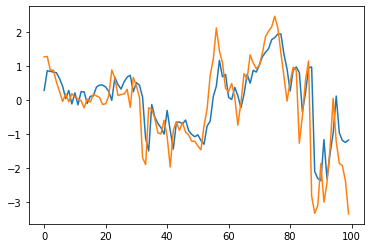

In [ ]:
df4= plot_predictions2(model,X_test,y_test)

In [ ]:
model.save("forcasting_model.h5")

In [ ]:
X_test.shape

(5582, 70, 10)

In [ ]:
example=X_test[70]
example_time= time_test[70]
example.shape, example_time.shape

((70, 10), (70,))

In [ ]:
example_time=np.array(pd.DataFrame(example_time)[0].map(pd.Timestamp.timestamp))


array([1.6225560e+09, 1.6225572e+09, 1.6225584e+09, 1.6225596e+09,
       1.6225608e+09, 1.6225620e+09, 1.6225632e+09, 1.6225644e+09,
       1.6225656e+09, 1.6225668e+09, 1.6225680e+09, 1.6225692e+09,
       1.6225704e+09, 1.6225716e+09, 1.6225728e+09, 1.6225740e+09,
       1.6225752e+09, 1.6225764e+09, 1.6225776e+09, 1.6225788e+09,
       1.6225800e+09, 1.6225812e+09, 1.6225824e+09, 1.6225836e+09,
       1.6225848e+09, 1.6225860e+09, 1.6225872e+09, 1.6225884e+09,
       1.6225896e+09, 1.6202592e+09, 1.6202604e+09, 1.6202616e+09,
       1.6202628e+09, 1.6202640e+09, 1.6202652e+09, 1.6202664e+09,
       1.6202676e+09, 1.6202688e+09, 1.6202700e+09, 1.6202712e+09,
       1.6202724e+09, 1.6202736e+09, 1.6202748e+09, 1.6202760e+09,
       1.6202772e+09, 1.6202784e+09, 1.6202796e+09, 1.6202808e+09,
       1.6202820e+09, 1.6202832e+09, 1.6202844e+09, 1.6202856e+09,
       1.6202868e+09, 1.6202880e+09, 1.6202892e+09, 1.6202904e+09,
       1.6202916e+09, 1.6202928e+09, 1.6202940e+09, 1.6202952e

In [ ]:
for i in range(70):
  prediction= model.predict(example[i:].reshape(1,70,10))
  example= np.append(example, prediction).reshape(70+i+1, 6)


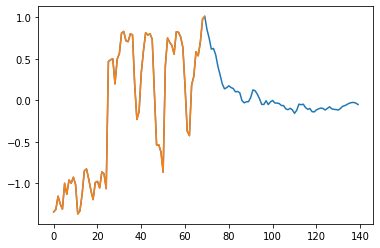

In [ ]:
df2= pd.DataFrame(example)
df3= pd.DataFrame(example[:70])
plt.plot(df2[0])
plt.plot(df3[0])


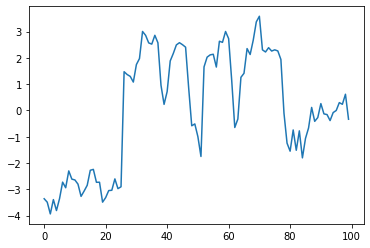

In [ ]:
df4["BGSM1 Predictions"].plot()

In [ ]:
df2 = pd.DataFrame(data={'BGSM1 Predictions': BGSM1_preds,
                          'BGSM1 Actuals':BGSM1_actuals,
                          'BGSM2 Predictions': BGSM2_preds,
                          'Pressure Actuals': BGSM2_actuals
                          })